In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [3]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
columns = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Class']
df = pd.read_csv(url, names=columns)

In [4]:
X = df.iloc[:, 0:4].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


c:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


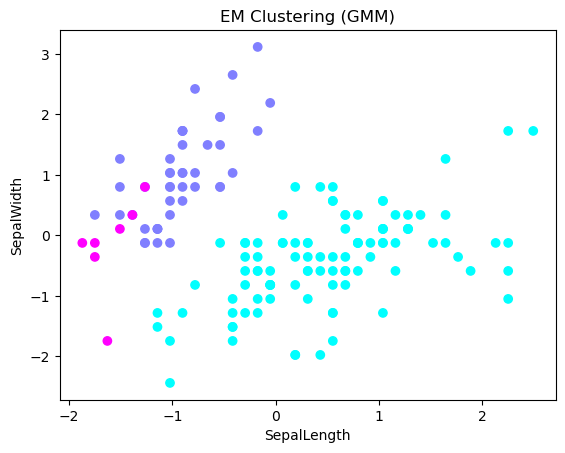

In [5]:
gmm = GaussianMixture(n_components=3, random_state=42)
gmm_labels = gmm.fit_predict(X_scaled)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=gmm_labels, cmap='cool')
plt.title("EM Clustering (GMM)")
plt.xlabel("SepalLength")
plt.ylabel("SepalWidth")
plt.show()

c:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


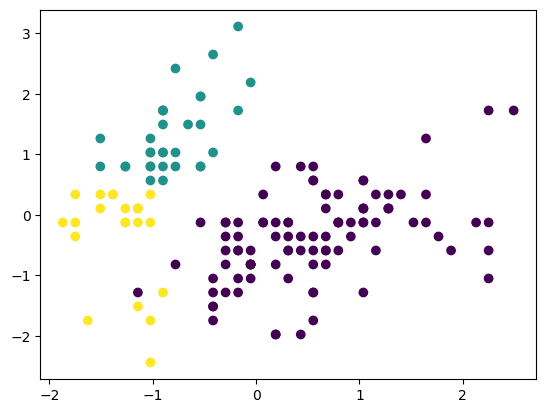

In [9]:
knn = KMeans(n_clusters=3, random_state=42)
kmeans_label = knn.fit_predict(X_scaled)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c = kmeans_label)

In [10]:
db = DBSCAN(eps=0.8, min_samples=5)
db_label = db.fit_predict(X_scaled)

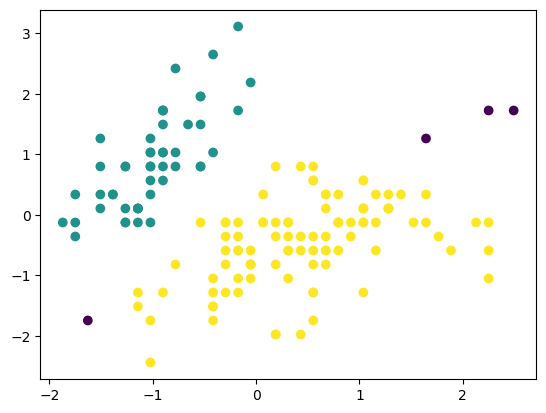

In [11]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c = db_label)

{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [5.0, 5.0, 20.0, 20.0],
  [35.0, 35.0, 45.0, 45.0],
  [75.0, 75.0, 85.0, 85.0],
  [65.0, 65.0, 80.0, 80.0],
  [55.0, 55.0, 72.5, 72.5],
  [40.0, 40.0, 63.75, 63.75],
  [115.0, 115.0, 125.0, 125.0],
  [105.0, 105.0, 120.0, 120.0],
  [95.0, 95.0, 112.5, 112.5],
  [51.875, 51.875, 103.75, 103.75],
  [12.5, 12.5, 77.8125, 77.8125],
  [155.0, 155.0, 165.0, 165.0],
  [145.0, 145.0, 160.0, 160.0],
  [135.0, 135.0, 152.5, 152.5],
  [175.0, 175.0, 185.0, 185.0],
  [195.0, 195.0, 205.0, 205.0],
  [180.0, 180.0, 200.0, 200.0],
  [143.75, 143.75, 190.0, 190.0],
  [225.0, 225.0, 235.0, 235.0],
  [215.0, 215.0, 230.0, 230.0],
  [275.0, 275.0, 285.0, 285.0],
  [265.0, 265.0, 280.0, 280.0],
  [255.0, 255.0, 272.5, 272.5],
  [245.0, 245.0, 263.75, 263.75],
  [222.5, 222.5, 254.375, 254.375],
  [166.875, 166.875, 238.4375, 238.4375],
  [315.0, 315.0, 325.0, 325.0],
  [305.0, 305.0, 320.0, 320.0],
  [295.0, 295.0, 312.5, 312.5],
  [335.0, 335.0, 345.0, 345.0],
  [3

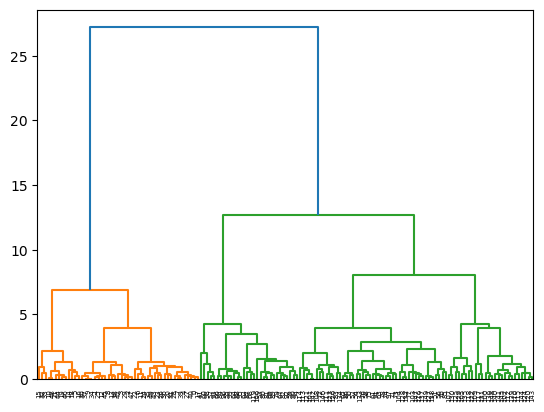

In [15]:
hier = linkage(X_scaled, method='ward')
hier_label = fcluster(hier, t=3, criterion='maxclust')
dendrogram(hier)